## 準備

### MeCab

参考: https://qiita.com/pytry3g/items/897ae738b8fbd3ae7893

In [1]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [4]:
import MeCab

tagger = MeCab.Tagger()
text = '吾輩は猫である'
print(tagger.parse(text))

吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
EOS



### CRF++

参考: https://tomowarkar.github.io/blog/posts/colab_mecab/

In [3]:
import os

filename_crfpp = 'crfpp.tar.gz'
!wget "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ" \
    -O $filename_crfpp
!tar -zxvf $filename_crfpp
%cd CRF++-0.58
!./configure
!make
!make install
%cd ..

os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib' 

--2022-04-05 01:29:45--  https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.113, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9t6r0tso760e3l709tkduvhq146l8tur/1649122125000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download [following]
--2022-04-05 01:29:46--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9t6r0tso760e3l709tkduvhq146l8tur/1649122125000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download
Resolving doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleuse

### Cabocha

In [4]:
!cp ./drive/MyDrive/100pon/data/cabocha-0.69.tar.bz2 ./

In [5]:
!tar -jxvf ./cabocha-0.69.tar.bz2

cabocha-0.69/
cabocha-0.69/cabocha-config.in
cabocha-0.69/compile
cabocha-0.69/swig/
cabocha-0.69/swig/version.h.in
cabocha-0.69/swig/Makefile
cabocha-0.69/swig/version.h
cabocha-0.69/swig/CaboCha.i
cabocha-0.69/missing
cabocha-0.69/java/
cabocha-0.69/java/test.java
cabocha-0.69/java/Makefile
cabocha-0.69/java/org/
cabocha-0.69/java/org/chasen/
cabocha-0.69/java/org/chasen/cabocha/
cabocha-0.69/java/org/chasen/cabocha/FormatType.java
cabocha-0.69/java/org/chasen/cabocha/OutputLayerType.java
cabocha-0.69/java/org/chasen/cabocha/Token.java
cabocha-0.69/java/org/chasen/cabocha/CaboChaConstants.java
cabocha-0.69/java/org/chasen/cabocha/ParserType.java
cabocha-0.69/java/org/chasen/cabocha/ParsingAlgorithm.java
cabocha-0.69/java/org/chasen/cabocha/Chunk.java
cabocha-0.69/java/org/chasen/cabocha/InputLayerType.java
cabocha-0.69/java/org/chasen/cabocha/CaboCha.java
cabocha-0.69/java/org/chasen/cabocha/CaboChaJNI.java
cabocha-0.69/java/org/chasen/cabocha/PossetType.java
cabocha-0.69/java/org/ch

In [6]:
# cabochaインストール
%cd cabocha-0.69
!./configure  --quiet -with-charset=utf-8
!make
!make check
!make install
!ldconfig
%cd ..

# cabocha-pythonのインストール
!pip -q install cabocha-0.69/python/

/content/cabocha-0.69
make  all-recursive
make[1]: Entering directory '/content/cabocha-0.69'
Making all in src
make[2]: Entering directory '/content/cabocha-0.69/src'
/bin/bash ../libtool  --tag=CXX   --mode=compile g++ -DHAVE_CONFIG_H -I. -I.. -DCABOCHA_DEFAULT_POSSET="\"IPA"\" -DCABOCHA_DEFAULT_CHARSET="\"utf-8"\" -DMODEL_VERSION=102  -DCABOCHA_DEFAULT_RC="\"/usr/local/etc/cabocharc\""    -O3 -Wno-deprecated -Wall -c -o chunk_learner.lo chunk_learner.cpp
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I.. -DCABOCHA_DEFAULT_POSSET=\"IPA\" -DCABOCHA_DEFAULT_CHARSET=\"utf-8\" -DMODEL_VERSION=102 -DCABOCHA_DEFAULT_RC=\"/usr/local/etc/cabocharc\" -O3 -Wno-deprecated -Wall -c chunk_learner.cpp  -fPIC -DPIC -o .libs/chunk_learner.o
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I.. -DCABOCHA_DEFAULT_POSSET=\"IPA\" -DCABOCHA_DEFAULT_CHARSET=\"utf-8\" -DMODEL_VERSION=102 -DCABOCHA_DEFAULT_RC=\"/usr/local/etc/cabocharc\" -O3 -Wno-deprecated -Wall -c chunk_learner.cpp -o chunk_learner.o >/dev/null 2>

In [2]:
import MeCab

In [3]:
import CaboCha

cp = CaboCha.Parser()
sentence = '太郎は花子が読んでいる本を次郎に渡した．'
res = cp.parseToString(sentence)
print(res)

ModuleNotFoundError: No module named 'CaboCha'

## 解析，結果の保存

In [8]:
cp = CaboCha.Parser()
tree = cp.parse(sentence)
print(tree.toString(CaboCha.FORMAT_LATTICE))

* 0 5D 0/1 -0.742128
太郎	名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/1 1.700175
花子	名詞,固有名詞,人名,名,*,*,花子,ハナコ,ハナコ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
* 2 3D 0/2 1.825021
読ん	動詞,自立,*,*,五段・マ行,連用タ接続,読む,ヨン,ヨン
で	助詞,接続助詞,*,*,*,*,で,デ,デ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
* 3 5D 0/1 -0.742128
本	名詞,一般,*,*,*,*,本,ホン,ホン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 4 5D 1/2 -0.742128
次	名詞,一般,*,*,*,*,次,ツギ,ツギ
郎	名詞,一般,*,*,*,*,郎,ロウ,ロー
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 5 -1D 0/1 0.000000
渡し	動詞,自立,*,*,五段・サ行,連用形,渡す,ワタシ,ワタシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
．	記号,句点,*,*,*,*,．,．,．
EOS



http://taku910.github.io/cabocha/

In [9]:
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ./ai.ja.zip

--2022-04-05 01:32:37--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0s      

2022-04-05 01:32:37 (55.3 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  ./ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [10]:
!head -n 5 ai.ja.txt
!wc -l ai.ja.txt

人工知能

人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。

『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
155 ai.ja.txt


In [11]:
!sed -i -z 's/\n\n/\n/g' ./ai.ja.txt

In [12]:
!head -n 5 ai.ja.txt
!wc -l ai.ja.txt

人工知能
人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。
『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
人間の知的能力をコンピュータ上で実現する、様々な技術・ソフトウェア・コンピュータシステム。応用例は自然言語処理（機械翻訳・かな漢字変換・構文解析等）、専門家の推論・判断を模倣するエキスパートシステム、画像データを解析して特定のパターンを検出・抽出したりする画像認識等がある。1956年にダートマス会議でジョン・マッカーシーにより命名された。現在では、記号処理を用いた知能の記述を主体とする情報処理や研究でのアプローチという意味あいでも使われている。家庭用電気機械器具の制御システムやゲームソフトの思考ルーチンもこう呼ばれることもある。
プログラミング言語 による「」というカウンセラーを模倣したプログラム（人工無脳）がしばしば引き合いに出されるが、計算機に人間の専門家の役割をさせようという「エキスパートシステム」と呼ばれる研究・情報処理システムの実現は、人間が暗黙に持つ常識の記述が問題となり、実用への利用が困難視されている。人工的な知能の実現へのアプローチとしては、「ファジィ理論」や「ニューラルネットワーク」などのようなアプローチも知られているが、従来の人工知能である (Good Old Fashioned AI) との差は記述の記号的明示性にある。その後「サポートベクターマシン」が注目を集めた。また、自らの経験を元に学習を行う強化学習という手法もある。「この宇宙において、知性とは最も強力な形質である（レイ・カーツワイル）」という言葉通り、知性を機械的に表現し実装するということは極めて重要な作業である。
83 ai.ja.txt


In [13]:
!cabocha -f1 ai.ja.txt -o ai.ja.txt.parsed
!head -n 30 ai.ja.txt.parsed
!wc -l ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 0.517898
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*
〉	記号,括弧閉,*,*,*,*,〉,〉,〉
）	記号,括弧閉,*,*,*,*,）,）,）
と	助詞,格助詞,引用,*,*,*,と,ト,ト
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 4 5D 2/2 1.035972
「	記号,括弧開,*,*,*,*,「,「,「
『	記号,括弧開,*,*,*,*,『,『,『
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
* 5 9D 0/3 1.243687
（	記号,括弧開,*,*,*,*,（,（,（
11672 ai.ja.txt.parsed


In [14]:
!cp ai.ja.txt.parsed  ./drive/MyDrive/100pon/data/

## 40

In [15]:
class Morph():

  def __init__(self, line):

    surface, info = line.split('\t', 1)
    info = info.split(',')
    self.surface = surface    # 表層形
    self.base = info[6]       # 基本形
    self.pos = info[0]        # 品詞
    self.pos1 = info[1]       # 品詞細分類1


In [16]:
print(Morph('太郎	名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー').__dict__)

{'surface': '太郎', 'base': '太郎', 'pos': '名詞', 'pos1': '固有名詞'}


In [17]:
import re
sentences, morphs = [], []

f = open('./ai.ja.txt.parsed', encoding='utf-8')
line = f.readline()

while line:
  line = line.strip()
  
  if len(re.findall('^\* ', line)):
    pass
  elif line == 'EOS':
    sentences.append(morphs)
    morphs = []
  else:
    morphs.append(Morph(line))

  line = f.readline()

f.close()

In [18]:
for morph in sentences[1][:10]:
  print(morph.__dict__)

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}


## 41

In [19]:
class Chunk():

  def __init__(self, morphs=None, dst=None, srcs=None):
    
    self.morphs = morphs    # 形態素（Morphオブジェクト）のリスト
    self.dst = dst          # 係り先文節インデックス番号
    self.srcs = srcs        # 係り元文節インデックス番号のリスト


In [7]:
import numpy as np

l = np.array([0, 1, 0, 1, 0, 1, 0, 0])
np.where(l==2)[0]

array([], dtype=int64)

In [10]:
l.tolist().index(2)

ValueError: 2 is not in list

In [ ]:
with open()

In [20]:
import re
import numpy as np

sentences, chunks, morphs = [], [], []
dst_sentence = []
chunk = None

f = open('./ai.ja.txt.parsed', encoding='utf-8')
line = f.readline()

while line:
  line = line.strip()
  
  if len(re.findall('^\* ', line)):
    if chunk:
      chunk.morphs = morphs
      chunks.append(chunk)
      morphs = []
    """
    Chunk()インスタンスの生成
    この行ではインデックスと係り先の情報が含まれる．
    """
    idx_chunk = len(chunks)
    dst = int(line.split(' ')[2][:-1])
    dst_sentence.append(dst)
    srcs = np.where(np.array(dst_sentence) == idx_chunk)[0].tolist()
    chunk = Chunk(dst=dst, srcs=srcs)
    

  elif line == 'EOS':
    chunk.morphs = morphs
    chunks.append(chunk)
    sentences.append(chunks)
    chunks, morphs = [], []
    chunk = None
    dst_sentence = []

  else:
    morphs.append(Morph(line))

  line = f.readline()

f.close()

In [21]:
for i, chunk in enumerate(sentences[1][:10]):
  morphs = chunk.morphs
  print(i)
  print('morphs: {}'.format([morph.__dict__ for morph in morphs]))
  print('dst: {}, srcs: {}'.format(chunk.dst, chunk.srcs), end='\n\n')

0
morphs: [{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}, {'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}]
dst: 17, srcs: []

1
morphs: [{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}, {'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}]
dst: 17, srcs: []

2
morphs: [{'surface': 'AI', 'base': '*', 'pos': '名詞', 'pos1': '一般'}]
dst: 3, srcs: []

3
morphs: [{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}, {'surface': 'エーアイ', 'base': '*', 'pos': '名詞', 'pos1': '固有名詞'}, {'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}, {'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}, {'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'sur

## 42

In [22]:
def morphs2phrase(morphs):

  phrase = ''
  parts_of_speeches = []
  for morph in morphs:
    if morph.pos == '記号':
      pass
    else:
      phrase += morph.surface
    parts_of_speeches.append(morph.pos)
  return phrase, parts_of_speeches

In [23]:
DstSrcsRelationships = []

for sentence in sentences:
  for chunk in sentence:
    idx_dst = chunk.dst
    if idx_dst >= 0:
      phr_src, _ = morphs2phrase(chunk.morphs)
      phr_dst, _ = morphs2phrase(sentence[idx_dst].morphs)
      DstSrcsRelationships.append('{}\t{}'.format(phr_src, phr_dst))

In [24]:
for r in DstSrcsRelationships[:20]:
  print(r)

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論


## 43

In [25]:
DstSrcsRelationships = []

for sentence in sentences:
  for chunk in sentence:
    idx_dst = chunk.dst
    if idx_dst >= 0:
      phr_src, pos_src = morphs2phrase(chunk.morphs)
      phr_dst, pos_dst = morphs2phrase(sentence[idx_dst].morphs)
      if ('名詞' in pos_src) and ('動詞' in pos_dst):
        DstSrcsRelationships.append('{}\t{}'.format(phr_src, phr_dst))

In [26]:
for r in DstSrcsRelationships[:20]:
  print(r)

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている
知的能力を	実現する
コンピュータ上で	実現する
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
推論判断を	模倣する
画像データを	解析して
解析して	検出抽出したりする
パターンを	検出抽出したりする
画像認識等が	ある
1956年に	命名された


## 44

In [27]:
!apt install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,552 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 156879 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [28]:
import CaboCha

def sentence2graph(sentence):

  cp = CaboCha.Parser()
  tree = cp.parse(sentence)
  res_parsing = tree.toString(CaboCha.FORMAT_LATTICE)

  label = ''
  labels, edges = [], []
  for line in res_parsing.split('\n'):
    line = line.strip()
    
    if len(re.findall('^\* ', line)):
      if len(label):
        labels.append(label)
      label = ''
      str_src, str_dst = line.split(' ')[1:3]
      if int(str_dst[:-1]) < 0:
        pass
      else:
        edges.append([int(str_src), int(str_dst[:-1])])
    
    elif line == 'EOS':
      labels.append(label)
      break
    
    else:
      surface, info = line.split('\t', 1)
      pos = info.split(',')[0]
      if pos != '記号':
        label += surface
  
  return labels, edges, res_parsing

In [29]:
from graphviz import Digraph
from IPython.display import Image, display

def visualizeTree(edges, num_nodes, labels):

  dg = Digraph(format='png')
  dg.attr('node', fontname="MS Gothic")
  for i in range(num_nodes):
    dg.node(str(i), label=labels[i])
    # dg.node(labels[i])
  
  for e in edges:
    dg.edge(str(e[0]), str(e[1]))
    # dg.edge(labels[e[0]], labels[e[1]])

  dg.render('digraph')
  display(Image('digraph.png'))

In [30]:
labels, edges, res_parsing = sentence2graph('太郎は花子が読んでいる本を次郎に渡した．')
print(res_parsing)
print(labels)
print(edges)

* 0 5D 0/1 -0.742128
太郎	名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/1 1.700175
花子	名詞,固有名詞,人名,名,*,*,花子,ハナコ,ハナコ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
* 2 3D 0/2 1.825021
読ん	動詞,自立,*,*,五段・マ行,連用タ接続,読む,ヨン,ヨン
で	助詞,接続助詞,*,*,*,*,で,デ,デ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
* 3 5D 0/1 -0.742128
本	名詞,一般,*,*,*,*,本,ホン,ホン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 4 5D 1/2 -0.742128
次	名詞,一般,*,*,*,*,次,ツギ,ツギ
郎	名詞,一般,*,*,*,*,郎,ロウ,ロー
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 5 -1D 0/1 0.000000
渡し	動詞,自立,*,*,五段・サ行,連用形,渡す,ワタシ,ワタシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
．	記号,句点,*,*,*,*,．,．,．
EOS

['太郎は', '花子が', '読んでいる', '本を', '次郎に', '渡した']
[[0, 5], [1, 2], [2, 3], [3, 5], [4, 5]]


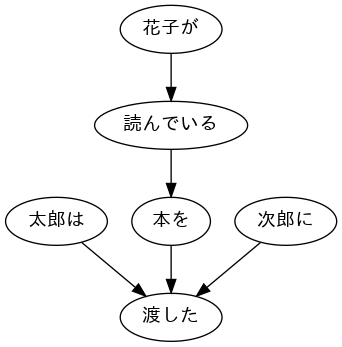

In [31]:
sentence = '太郎は花子が読んでいる本を次郎に渡した．'
labels, edges, res_parsing = sentence2graph(sentence)
visualizeTree(edges=edges, num_nodes=len(labels), labels=labels)

## 45

In [1]:
l = [1, 2, 3, 4, 1, 3, 2]
l.index(3)

2

* 0 6D 2/3 -1.872007
ジョン	名詞,固有名詞,人名,名,*,*,ジョン,ジョン,ジョン
・	記号,一般,*,*,*,*,・,・,・
マッカーシー	名詞,固有名詞,人名,姓,*,*,マッカーシー,マッカーシー,マッカーシー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/1 0.773846
AI	名詞,一般,*,*,*,*,*
に関する	助詞,格助詞,連語,*,*,*,に関する,ニカンスル,ニカンスル
* 2 3D 0/1 1.025254
最初	名詞,一般,*,*,*,*,最初,サイショ,サイショ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 3 6D 0/1 -1.872007
会議	名詞,サ変接続,*,*,*,*,会議,カイギ,カイギ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
* 4 5D 1/2 1.473677
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 5 6D 0/1 -1.872007
用語	名詞,一般,*,*,*,*,用語,ヨウゴ,ヨーゴ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 6 -1D 0/1 0.000000
作り出し	動詞,自立,*,*,五段・サ行,連用形,作り出す,ツクリダシ,ツクリダシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
EOS



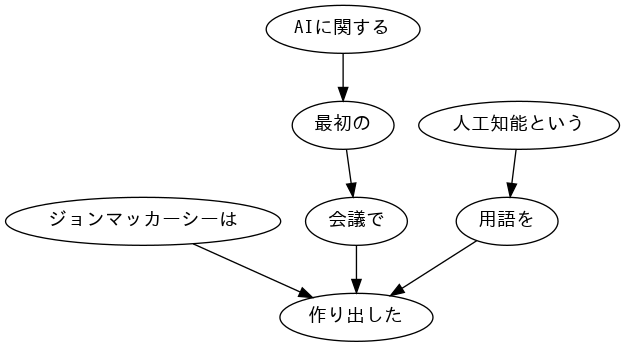

In [32]:
labels, edges, res_parsing = sentence2graph('ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。')
print(res_parsing)
visualizeTree(edges=edges, num_nodes=len(labels), labels=labels)

In [33]:
!head -n 5 ai.ja.txt

人工知能
人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。
『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
人間の知的能力をコンピュータ上で実現する、様々な技術・ソフトウェア・コンピュータシステム。応用例は自然言語処理（機械翻訳・かな漢字変換・構文解析等）、専門家の推論・判断を模倣するエキスパートシステム、画像データを解析して特定のパターンを検出・抽出したりする画像認識等がある。1956年にダートマス会議でジョン・マッカーシーにより命名された。現在では、記号処理を用いた知能の記述を主体とする情報処理や研究でのアプローチという意味あいでも使われている。家庭用電気機械器具の制御システムやゲームソフトの思考ルーチンもこう呼ばれることもある。
プログラミング言語 による「」というカウンセラーを模倣したプログラム（人工無脳）がしばしば引き合いに出されるが、計算機に人間の専門家の役割をさせようという「エキスパートシステム」と呼ばれる研究・情報処理システムの実現は、人間が暗黙に持つ常識の記述が問題となり、実用への利用が困難視されている。人工的な知能の実現へのアプローチとしては、「ファジィ理論」や「ニューラルネットワーク」などのようなアプローチも知られているが、従来の人工知能である (Good Old Fashioned AI) との差は記述の記号的明示性にある。その後「サポートベクターマシン」が注目を集めた。また、自らの経験を元に学習を行う強化学習という手法もある。「この宇宙において、知性とは最も強力な形質である（レイ・カーツワイル）」という言葉通り、知性を機械的に表現し実装するということは極めて重要な作業である。


In [3]:
import numpy as np

l = np.array(['あ', 'い', 'う', 'い', 'え'])

print(l[np.argsort(l)])

['あ' 'い' 'い' 'う' 'え']


In [8]:
a = 1
result = 0 if a % 2 == 0 else 1
print(type(result))

<class 'int'>


In [34]:
def extract_verb_case(sentence):
  
  verb_case_patterns = [] # result

  includeVerb = False # 「～している」など，動詞が連続する場合の制御
  DestinationIdx = [] # 係先インデックス
  CasesInSentence = []   # 節ごとの格 
  CaseFramesInSentence = [] # 節ごとの格フレーム
  phrase = ''

  # 係り受け解析
  cp = CaboCha.Parser()
  tree = cp.parse(sentence)
  res_parsing = tree.toString(CaboCha.FORMAT_LATTICE)

  for line in res_parsing.split('\n'):

    line = line.strip()

    if len(re.findall('^\* ', line)): #　頭が*
      """
      * 0 6D 2/3 -1.872007
      """
      line = line.split(' ')
      source, destination = line[1], int(line[2][:-1])
      DestinationIdx.append(destination)
      CasesInSentence.append([])
      CaseFramesInSentence.append([])
      includeVerb = False
      phrase = ''
    
    elif line == 'EOS':
      DestinationIdx, CasesInSentence, CaseFramesInSentence = [], [], []
      includeVerb = False
    
    elif line:      # surface\tpos,pos1,...の形
      """
      作り出し	動詞,自立,*,*,五段・サ行,連用形,作り出す,ツクリダシ,ツクリダシ
      """
      surface, info = line.split('\t', 1)
      info = info.split(',')
      pos, base = info[0], info[6]
      phrase += surface

      if pos == '助詞':
        CasesInSentence[-1].append(surface)
        CaseFramesInSentence[-1].append(phrase)

      elif pos == '動詞':
        
        if includeVerb:
          pass
        else:   # 係元の格を収集
          includeVerb = True
          sources_idx = np.where(np.array(DestinationIdx) == int(source))[0]
          pattern = [base, 
                     [CasesInSentence[i][0] for i in sources_idx if len(CasesInSentence[i]) > 0],
                     [CaseFramesInSentence[i][0] for i in sources_idx if len(CaseFramesInSentence[i]) > 0]]
          verb_case_patterns.append(pattern)
  
  return verb_case_patterns

In [35]:
extract_verb_case('太郎は花子が読んでいる本を次郎に渡している．')

[['読む', ['が'], ['花子が']], ['渡す', ['は', 'を', 'に'], ['太郎は', '本を', '次郎に']]]

In [36]:
extract_verb_case('ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。')

[['作り出す', ['は', 'で', 'を'], ['ジョン・マッカーシーは', '会議で', '用語を']]]

In [37]:
import re

fi = open('./ai.ja.txt', 'r', encoding='utf-8')
fo = open('./ai_vcpatterns.txt', 'w', encoding='utf-8')
line = fi.readline()

while line:
  line = line.strip()
  verb_case_patterns = extract_verb_case(line)
  for verb, cases, caseframes in verb_case_patterns:
    if len(cases):
      # cases = list(set(cases))
      cases.sort()
      fo.write(verb + '\t' + ' '.join(cases) + '\n')
  line = fi.readline()

fi.close()
fo.close()

In [38]:
!head -n 5 ./ai_vcpatterns.txt
!wc -l ./ai_vcpatterns.txt

用いる	を
する	て を
指す	を
代わる	に を
行う	て に
686 ./ai_vcpatterns.txt


### コーパス中で頻出する述語と格パターンの組み合わせ

In [39]:
!sort ./ai_vcpatterns.txt | uniq -c | sort -nr > ./ai_vcpatterns_sorted.txt
!head -n 10 ./ai_vcpatterns_sorted.txt

    142 する	と
     99 する	て を
     45 する	が が は
     12 ある	て て に は
      9 行う	を
      7 呼ぶ	も
      6 基づく	に
      6 する	より
      5 行う	て に
      5 する	から を


### 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順）

In [40]:
!sort ./ai_vcpatterns.txt | grep -Ee '^行う' -Ee '^なる' -Ee '^与える' | uniq -c | sort -nr > ./ai_vcpatterns_sorted.txt
!head -n 30 ./ai_vcpatterns_sorted.txt

     10 なる	が と
      9 行う	を
      5 行う	て に
      5 なる	に
      4 行う	に を を
      4 なる	が て と
      2 行う	が て で に
      1 行う	まで を
      1 行う	から
      1 行う	に まで を
      1 行う	は を をめぐって
      1 行う	に に により を
      1 与える	が など
      1 与える	に は を
      1 与える	が に
      1 なる	から が て で と
      1 なる	から で と
      1 なる	て として に は
      1 なる	が と にとって
      1 なる	で と など
      1 なる	が で と に は は


## 46

In [41]:
import re

fi = open('./ai.ja.txt', 'r', encoding='utf-8')
fo = open('./ai_vcpatterns.txt', 'w', encoding='utf-8')
line = fi.readline()

while line:
  line = line.strip()
  verb_case_patterns = extract_verb_case(line)
  for verb, cases, caseframes in verb_case_patterns:
    if len(cases):
      sorted_idx = np.argsort(cases)
      cases = np.array(cases)[sorted_idx].tolist()
      caseframes = np.array(caseframes)[sorted_idx].tolist()
      # cases = list(set(cases))
      fo.write(verb + '\t' + ' '.join(cases) + '\t' + ' '.join(caseframes) + '\n')
  line = fi.readline()

fi.close()
fo.close()

In [42]:
!head -n 5 ./ai_vcpatterns.txt
!wc -l ./ai_vcpatterns.txt

用いる	を	道具を
する	て を	用いて 『知能』を
指す	を	一分野」を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに
686 ./ai_vcpatterns.txt


## 47

In [43]:
labels, edges, res_parsing = sentence2graph('自らの経験を元に学習を行う')
print(res_parsing)

* 0 1D 0/1 1.941448
自ら	名詞,副詞可能,*,*,*,*,自ら,ミズカラ,ミズカラ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 1 4D 0/1 -0.653907
経験	名詞,サ変接続,*,*,*,*,経験,ケイケン,ケイケン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 2 4D 0/1 -0.653907
元	名詞,一般,*,*,*,*,元,モト,モト
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 3 4D 0/1 -0.653907
学習	名詞,サ変接続,*,*,*,*,学習,ガクシュウ,ガクシュー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 4 -1D 0/0 0.000000
行う	動詞,自立,*,*,五段・ワ行促音便,基本形,行う,オコナウ,オコナウ
EOS



In [44]:
def extractFunctionVerbs(sentence):
  
  verb_case_patterns = [] # result

  includeVerb = False # 「～している」など，動詞が連続する場合の制御
  DestinationIdx = [] # 係先インデックス
  CasesInSentence = []   # 節ごとの格 
  CaseFramesInSentence = [] # 節ごとの格フレーム
  sNouns = [] # 節ごとのサ変接続名詞
  phrase = ''

  # 係り受け解析
  cp = CaboCha.Parser()
  tree = cp.parse(sentence)
  res_parsing = tree.toString(CaboCha.FORMAT_LATTICE)

  for line in res_parsing.split('\n'):

    line = line.strip()

    if len(re.findall('^\* ', line)): #　頭が*
      """
      * 0 6D 2/3 -1.872007
      """
      line = line.split(' ')
      source, destination = line[1], int(line[2][:-1])
      DestinationIdx.append(destination)
      CasesInSentence.append([])
      CaseFramesInSentence.append([])
      sNouns.append(None)
      includeVerb = False
      phrase = ''
    
    elif line == 'EOS':
      DestinationIdx, CasesInSentence, CaseFramesInSentence = [], [], []
      # print(sNouns)
      sNouns = []
      includeVerb = False
    
    elif line:      # surface\tpos,pos1,...の形
      """
      作り出し	動詞,自立,*,*,五段・サ行,連用形,作り出す,ツクリダシ,ツクリダシ
      """
      surface, info = line.split('\t', 1)
      info = info.split(',')
      pos, pos1, base = info[0], info[1], info[6]
      phrase += surface

      if pos == '助詞':
        CasesInSentence[-1].append(surface)
        CaseFramesInSentence[-1].append(phrase)
      
      elif pos == '名詞' and pos1 == 'サ変接続':
        sNouns[int(source)] = surface

      elif pos == '動詞':
        
        if includeVerb:
          pass
        else:   # 係元の格を収集
          includeVerb = True
          sources_idx = np.where(np.array(DestinationIdx) == int(source))[0]
          sources_words = np.array(sNouns)[sources_idx] # サ変接続名詞の候補
          
          if np.sum(sources_words!=None) > 0:
            pattern = [str(sources_words[sources_words != None][-1]) + 'を' + base, 
                      [CasesInSentence[i][0] for i in sources_idx if len(CasesInSentence[i]) > 0][:-1],
                      [CaseFramesInSentence[i][0] for i in sources_idx if len(CaseFramesInSentence[i]) > 0][:-1]]
            verb_case_patterns.append(pattern)
  
  return verb_case_patterns

In [45]:
extractFunctionVerbs('自らの経験を元に学習を行う')

[['学習を行う', ['を', 'に'], ['経験を', '元に']]]

In [46]:
import re

fi = open('./ai.ja.txt', 'r', encoding='utf-8')
fo = open('./ai_vcpatterns.txt', 'w', encoding='utf-8')
line = fi.readline()

while line:
  line = line.strip()
  verb_case_patterns = extractFunctionVerbs(line)
  for verb, cases, caseframes in verb_case_patterns:
    if len(cases):
      sorted_idx = np.argsort(cases)
      cases = np.array(cases)[sorted_idx].tolist()
      caseframes = np.array(caseframes)[sorted_idx].tolist()
      # cases = list(set(cases))
      fo.write(verb + '\t' + ' '.join(cases) + '\t' + ' '.join(caseframes) + '\n')
  line = fi.readline()

fi.close()
fo.close()

In [47]:
!head -n 30 ./ai_vcpatterns.txt
!wc -l ./ai_vcpatterns.txt

行動を代わる	を	知的行動を
解説を述べる	で は	解説で 佐藤理史は
解析をする	て	解析して
認識をある	は	応用例は
会議をする	で に	ダートマス会議で 1956年に
記述をする	を	記述を
命名を使う	で	現在で
プログラムを出す	が	（人工無脳）が
計算をする	に	計算機に
記述をなる	が	記述が
利用をする	が は	出されるが 実現は
アプローチを知る	として	アプローチとして
明示をある	て て は	困難視されて 知られて 差は
注目を集める	が	「サポートベクターマシン」が
学習を行う	に を	元に 経験を
浸透を行く	により	登場により
)」をする	が として	「MicrosoftSuphx(SuperPhoenix)」が AIとして
到達をなる	で など	麻雀で 到達するなど
学習を呼ぶ	は	人工知能は
関係をある	て として	関係して 手法として
生成をする	て で に を を	なされて ACT-Rで 元に 推論ルールを 統計的学習を
研究を行う	が て で	研究が 出して 第3次人工知能ブームで
進化を見せる	て て において は	活躍して 加えて 生成技術において （敵対的生成ネットワーク）は
応用を広がる	に は	背景に 森正弥は
応用を始まる	て て	見せて 広がって
解決をなる	が て	解決が 試みられて
計算をする	は	ブレーズ・パスカルは
開発を行う	は	エイダ・ラブレスは
出版をもたらす	に は	形式論理に アルフレッド・ノース・ホワイトヘッドは
会議を作り出す	で は	会議で ジョン・マッカーシーは
220 ./ai_vcpatterns.txt


## 48

In [48]:
print(sentences[1][-1].__dict__)
print(sentences[1][-1].morphs[0].__dict__)

{'morphs': [<__main__.Morph object at 0x7f644f93f690>, <__main__.Morph object at 0x7f644f93f7d0>, <__main__.Morph object at 0x7f644f93f810>], 'dst': -1, 'srcs': [34]}
{'surface': 'さ', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}


In [170]:
import re

def SearchNounInSentence(sentence):
  
  noun_bin = np.zeros(len(sentence)).astype(int) # multi-hot
  noun_path_array = np.zeros((len(sentence), len(sentence))).astype(int)
  phrases_in_sentence = []
  phrases_in_sentence_labeled = []
  for i, phrase in enumerate(sentence):
    phr = ''
    phr_labeled = ''
    noun_path_array[i][i] = 1
    #  print(phrase.morphs[-1].surface)

    if phrase.dst > 0 and phrase.morphs[-1].surface != '。':
        noun_path_array[i][phrase.dst] = 1
        for j in np.where(noun_path_array[:, i]==1)[0]:
          noun_path_array[j][phrase.dst] = 1 

    for morph in phrase.morphs:
      if morph.pos == '名詞':
        noun_bin[i] = 1
        phr_labeled += '[NOUN]'
      else:
        phr_labeled += morph.surface
      phr += morph.surface

    phrases_in_sentence.append(phr)
    phrases_in_sentence_labeled.append(phr_labeled)
  
  return noun_bin.tolist(), noun_path_array, phrases_in_sentence, phrases_in_sentence_labeled


In [171]:
noun_bin, noun_path_array, phrases_in_sentence, _ = SearchNounInSentence(sentences[13])
for i in np.where(np.array(noun_bin)==1)[0]:
  print(np.array(phrases_in_sentence)[np.where(noun_path_array[i]==1)[0]])

['1950年代に' 'なると' '出始めた。']
['AIに関して' '出始めた。']
['活発な' '成果が' '出始めた。']
['成果が' '出始めた。']
['ジョン・マッカーシーは' '作り出した。']
['AIに関する' '最初の' '会議で' '作り出した。']
['最初の' '会議で' '作り出した。']
['会議で' '作り出した。']
['「人工知能」という' '用語を' '作り出した。']
['用語を' '作り出した。']
['彼はまた' '開発した。']
['プログラミング言語を' '開発した。']
['開発した。']
['知的ふるまいに関する' 'テストを' '可能にする' '方法として、' '導入した。']
['テストを' '可能にする' '方法として、' '導入した。']
['可能にする' '方法として、' '導入した。']
['方法として、' '導入した。']
['アラン・チューリングは' '導入した。']
['「チューリングテスト」を' '導入した。']
['導入した。']
['ジョセフ・ワイゼンバウムはを' '構築した。']
['構築した。']
['これは' 'おしゃべりロボットである。']
['来談者中心療法を' '行う' 'おしゃべりロボットである。']
['おしゃべりロボットである。']


In [172]:
f = open('path_from_noun.txt', 'w')

for sentence in sentences:
  noun_bin, noun_path_array, phrases_in_sentence, _ = SearchNounInSentence(sentence)
  for i in np.where(np.array(noun_bin)==1)[0]: # 名詞を含む文節について
    idx_in_path = np.where(noun_path_array[i]==1)[0]
    words_in_path = np.array(phrases_in_sentence)[idx_in_path]
    if len(words_in_path) > 1:
      f.write(' -> '.join(words_in_path) + '\n')

f.close()

In [173]:
!head -n 20 ./path_from_noun.txt
!wc -l ./path_from_noun.txt

人工知能 -> 語。
（じんこうちのう、、 -> 語。
AI -> 〈エーアイ〉）とは、 -> 語。
〈エーアイ〉）とは、 -> 語。
「『計算 -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
『コンピュータ -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
『知能』を -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
計算機科学 -> （）の -> 一分野」を -> 指す -> 語。
一分野」を -> 指す -> 語。
「言語の -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
理解や -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
人間に -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
コンピューターに -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される。
技術」、または、 -> 研究分野」とも -> される。
2304 ./path_from_noun.txt


## 49

In [2]:
l = [['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c']]
l = [' -> '.join(k) for k in l]
' | '.join(l)

'a -> b -> c | a -> b -> c | a -> b -> c'

In [174]:
noun_bin, noun_path_array, phrases_in_sentence, phrases_in_sentence_labeled = SearchNounInSentence(sentences[13])
for i in np.where(np.array(noun_bin)==1)[0]:
  print(np.array(phrases_in_sentence)[np.where(noun_path_array[i]==1)[0]])

['1950年代に' 'なると' '出始めた。']
['AIに関して' '出始めた。']
['活発な' '成果が' '出始めた。']
['成果が' '出始めた。']
['ジョン・マッカーシーは' '作り出した。']
['AIに関する' '最初の' '会議で' '作り出した。']
['最初の' '会議で' '作り出した。']
['会議で' '作り出した。']
['「人工知能」という' '用語を' '作り出した。']
['用語を' '作り出した。']
['彼はまた' '開発した。']
['プログラミング言語を' '開発した。']
['開発した。']
['知的ふるまいに関する' 'テストを' '可能にする' '方法として、' '導入した。']
['テストを' '可能にする' '方法として、' '導入した。']
['可能にする' '方法として、' '導入した。']
['方法として、' '導入した。']
['アラン・チューリングは' '導入した。']
['「チューリングテスト」を' '導入した。']
['導入した。']
['ジョセフ・ワイゼンバウムはを' '構築した。']
['構築した。']
['これは' 'おしゃべりロボットである。']
['来談者中心療法を' '行う' 'おしゃべりロボットである。']
['おしゃべりロボットである。']


In [175]:
def get_path(noun_path_array, label):
  
  if noun_path_array.shape[0] <= label:
    return -1
  else:
    return np.where(noun_path_array[label] == 1)[0]


In [8]:
import itertools

list(itertools.combinations(range(1), 2))

[]

In [176]:
import itertools

noun_bin, noun_path_array, phrases_in_sentence, phrases_in_sentence_labeled = SearchNounInSentence(sentences[1])
for i in np.where(np.array(noun_bin)==1)[0]:
  print(np.array(phrases_in_sentence)[np.where(noun_path_array[i]==1)[0]])
noun_bin = np.array(noun_bin)
noun_labels = np.where(noun_bin==1)[0].tolist()

['人工知能' '語。']
['（じんこうちのう、、' '語。']
['AI' '〈エーアイ〉）とは、' '語。']
['〈エーアイ〉）とは、' '語。']
['「『計算' '（）』という' '道具を' '用いて' '研究する' '計算機科学' '（）の' '一分野」を' '指す' '語。']
['概念と' '道具を' '用いて' '研究する' '計算機科学' '（）の' '一分野」を' '指す' '語。']
['『コンピュータ' '（）』という' '道具を' '用いて' '研究する' '計算機科学' '（）の' '一分野」を' '指す' '語。']
['道具を' '用いて' '研究する' '計算機科学' '（）の' '一分野」を' '指す' '語。']
['『知能』を' '研究する' '計算機科学' '（）の' '一分野」を' '指す' '語。']
['研究する' '計算機科学' '（）の' '一分野」を' '指す' '語。']
['計算機科学' '（）の' '一分野」を' '指す' '語。']
['一分野」を' '指す' '語。']
['語。']
['「言語の' '推論、' '問題解決などの' '知的行動を' '代わって' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['理解や' '推論、' '問題解決などの' '知的行動を' '代わって' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['推論、' '問題解決などの' '知的行動を' '代わって' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['問題解決などの' '知的行動を' '代わって' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['知的行動を' '代わって' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['人間に' '代わって' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['コンピューターに' '行わせる' '技術」、または、' '研究分野」とも' 'される。']
['技術」、または、' '研究分野」とも' 'される。']
['「計算機' '（コンピュータ）による' '情報処理システムの' '実現に関する' '研究分野」とも' 'される。

In [213]:
remove_chars = '「」『』【】（）〈〉'

In [214]:
import itertools
import re

for sentence in sentences[13:14]:

  noun_bin, noun_path_array, phrases_in_sentence, phrases_in_sentence_labeled = SearchNounInSentence(sentence)
  phrases_in_sentence = np.array(phrases_in_sentence)

  noun_labels = np.where(np.array(noun_bin)==1)[0].tolist()
  noun_labels_pairs = list(itertools.combinations(noun_labels, 2))
  for noun_label1, noun_label2 in noun_labels_pairs:
    
    path1, path2 = get_path(noun_path_array, noun_label1), get_path(noun_path_array, noun_label2)
    prod_labels = list(set(path1) & set(path2)) # 共通ラベル
    if len(prod_labels) == 0:
      continue
    elif noun_label2 in path1:
      idx_in_path = np.array(path1)[:np.where(np.array(path1)==noun_label2)[0][0]].tolist() + [noun_label2]
      words_in_path = phrases_in_sentence[idx_in_path]
      X_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[idx_in_path[0]])
      Y_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[idx_in_path[-1]])
      X_text = re.sub('['+remove_chars+']', '', X_text)
      Y_text = re.sub('['+remove_chars+']', '', Y_text)
      
      words_in_path = [X_text.replace('[NOUN]', 'X')] + words_in_path[1:-1].tolist() + [Y_text.replace('[NOUN]', 'Y')]
      print(' -> '.join(words_in_path))
    else:
      union_label = min(prod_labels)
      path1 = path1[:np.where(np.array(path1)==union_label)[0][0]]
      path2 = path2[:np.where(np.array(path2)==union_label)[0][0]]
      X_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[path1[0]])
      Y_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[path2[0]])
      X_text = re.sub('['+remove_chars+']', '', X_text)
      Y_text = re.sub('['+remove_chars+']', '', Y_text)
      print(' -> '.join([X_text.replace('[NOUN]', 'X')] + np.array(phrases_in_sentence)[path1[1:]].tolist()) + 
            ' | ' + ' -> '.join([Y_text.replace('[NOUN]', 'Y')] + np.array(phrases_in_sentence)[path2[1:]].tolist()) + 
            ' | ' + phrases_in_sentence[union_label])
      

Xに -> なると | Yに関して | 出始めた。
Xに -> なると | Yな -> 成果が | 出始めた。
Xに -> なると | Yが | 出始めた。
Xに関して | Yな -> 成果が | 出始めた。
Xに関して | Yが | 出始めた。
Xな -> Yが
Xは | Yに関する -> 最初の -> 会議で | 作り出した。
Xは | Yの -> 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yという -> 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した。
Xに関する -> 最初の -> 会議で | Yを | 作り出した。
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した。
Xの -> 会議で | Yを | 作り出した。
Xで | Yという -> 用語を | 作り出した。
Xで | Yを | 作り出した。
Xという -> Yを
Xはまた | Yを | 開発した。
Xはまた -> Yした。
Xを -> Yした。
Xふるまいに関する -> Yを
Xふるまいに関する -> テストを -> Yにする
Xふるまいに関する -> テストを -> 可能にする -> Yとして、
Xふるまいに関する -> テストを -> 可能にする -> 方法として、 | Yは | 導入した。
Xふるまいに関する -> テストを -> 可能にする -> 方法として、 | Yを | 導入した。
Xふるまいに関する -> テストを -> 可能にする -> 方法として、 -> Yした。
Xを -> Yにする
Xを -> 可能にする -> Yとして、
Xを -> 可能にする -> 方法として、 | Yは | 導入した。
Xを -> 可能にする -> 方法として、 | Yを | 導入した。
Xを -> 可能にする -> 方法として、 -> Yした。
Xにする -> Yとして、
Xにする -> 方法として、 | Yは | 導入した。
Xにする -> 方法として、 | Yを | 導入した。
Xにする -> 方法として、 -> Yした。
Xとして、 | Yは | 導入した。
Xとして、 | Yを |

In [215]:
import itertools
import re

f = open('path_between_nouns.txt', 'w')

for sentence in sentences:

  noun_bin, noun_path_array, phrases_in_sentence, phrases_in_sentence_labeled = SearchNounInSentence(sentence)
  phrases_in_sentence = np.array(phrases_in_sentence)

  noun_labels = np.where(np.array(noun_bin)==1)[0].tolist()
  noun_labels_pairs = list(itertools.combinations(noun_labels, 2))
  for noun_label1, noun_label2 in noun_labels_pairs:
    
    path1, path2 = get_path(noun_path_array, noun_label1), get_path(noun_path_array, noun_label2)
    prod_labels = list(set(path1) & set(path2)) # 共通ラベル
    if len(prod_labels) == 0:
      continue
    elif noun_label2 in path1:
      idx_in_path = np.array(path1)[:np.where(np.array(path1)==noun_label2)[0][0]].tolist() + [noun_label2]
      words_in_path = phrases_in_sentence[idx_in_path]
      X_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[idx_in_path[0]])
      Y_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[idx_in_path[-1]])
      X_text = re.sub('['+remove_chars+']', '', X_text)
      Y_text = re.sub('['+remove_chars+']', '', Y_text)
      words_in_path = [X_text.replace('[NOUN]', 'X')] + words_in_path[1:-1].tolist() + [Y_text.replace('[NOUN]', 'Y')]
      f.write(' -> '.join(words_in_path) + '\n')
    else:
      union_label = min(prod_labels)
      path1 = path1[:np.where(np.array(path1)==union_label)[0][0]]
      path2 = path2[:np.where(np.array(path2)==union_label)[0][0]]
      X_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[path1[0]])
      Y_text = re.sub('\[NOUN\].*\[NOUN\]', '[NOUN]', phrases_in_sentence_labeled[path2[0]])
      X_text = re.sub('['+remove_chars+']', '', X_text)
      Y_text = re.sub('['+remove_chars+']', '', Y_text)
      f.write(' -> '.join([X_text.replace('[NOUN]', 'X')] + np.array(phrases_in_sentence)[path1[1:]].tolist()) + 
            ' | ' + ' -> '.join([Y_text.replace('[NOUN]', 'Y')] + np.array(phrases_in_sentence)[path2[1:]].tolist()) + 
            ' | ' + phrases_in_sentence[union_label] + 
            '\n')

f.close()


In [217]:
!head -n 50 path_between_nouns.txt
!wc -l path_between_nouns.txt

X | Yのう、、 | 語。
X | Y -> 〈エーアイ〉）とは、 | 語。
X | Yとは、 | 語。
X | Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yする -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Y -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 指す | 語。
X -> Y。
Xのう、、 | Y -> 〈エーアイ〉）とは、 | 語。
Xのう、、 | Yとは、 | 語。
Xのう、、 | Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Yを -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Yを -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Yする -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Y -> （）の -> 一分野」を -> 指す | 語。
Xのう、、 | Yを -> 指す | 語。
Xのう、、 -> Y。
X -> Yとは、
X -